In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc


In [2]:
data = pd.read_csv('HorrorSVMCookies.csv')
data

,Title,Author,Year,Rating,Raters,Rating_class
0,The Shining (Paperback),Stephen King,1977,4.26,1331732,good
1,It (Paperback),Stephen King,1986,4.25,979436,good
2,Dracula (Paperback),Bram Stoker,1897,4.01,1119957,good
3,Carrie (Mass Market Paperback),Stephen King,1974,3.98,630669,mid
4,Pet Sematary (Kindle Edition),Stephen King,1983,4.04,516341,good
...,...,...,...,...,...,...
1243,The Other Black Girl (Hardcover),Zakiya Dalila Harris,2021,3.40,59940,mid
1244,"Blood Countess (Lady Slayers, #1)",Lana Popović,2020,3.47,2136,mid
1245,"The Cuckoo Clock of Doom (Goosebumps, #28)",R.L. Stine,1995,3.64,7614,mid
1246,Färjan (Hardcover),Mats Strandberg,2015,3.45,3671,mid


In [3]:
#_oh refers to one-hot
data_oh = pd.get_dummies(data)
#Displaying the one-hot encoded dataframe
data_oh 

,Year,Rating,Raters,Title_'Salem's Lot (Hardcover),Title_'Salem's Lot (Paperback),Title_11/22/63 (Hardcover),"Title_13 Bullets (Laura Caxton, #1)","Title_14 (Threshold, #1)",Title_172 Hours on the Moon (Paperback),Title_1922,...,Author_William Hjortsberg,Author_William Hope Hodgson,Author_William March,Author_William Peter Blatty,Author_Yrsa Sigurðardóttir,Author_Yōko Ogawa,Author_Zakiya Dalila Harris,Author_Zoje Stage,Rating_class_good,Rating_class_mid
0,1977,4.26,1331732,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1986,4.25,979436,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1897,4.01,1119957,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1974,3.98,630669,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1983,4.04,516341,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,2021,3.40,59940,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1244,2020,3.47,2136,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1245,1995,3.64,7614,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1246,2015,3.45,3671,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
#here we set the the good rating class as the target data to compare the accuracy of the clustering
#in this column, a row/object has the value 1 if it is considered good rating, and 0 if the rating is mid/bad

target = data_oh['Rating_class_good'].to_list()
righttarget = [] #right target is a list if the value of the 'Rating_class_good' of that row is 1 
lefttarget = [] #left target is a list if the value of the 'Rating_class_good' of that row is 0 
for i in target:
    if i ==0:
        righttarget.append(target[i])
    else :
        lefttarget.append(target[i])
print("total of right target (1 value/ has good rating)= " +str(len(righttarget))) 
print("total of left target (0 value/ has not good rating(mid-bad))=  = " +str(len(lefttarget)))

total of right target (1 value/ has good rating)= 846
total of left target (0 value/ has not good rating(mid-bad))=  = 402


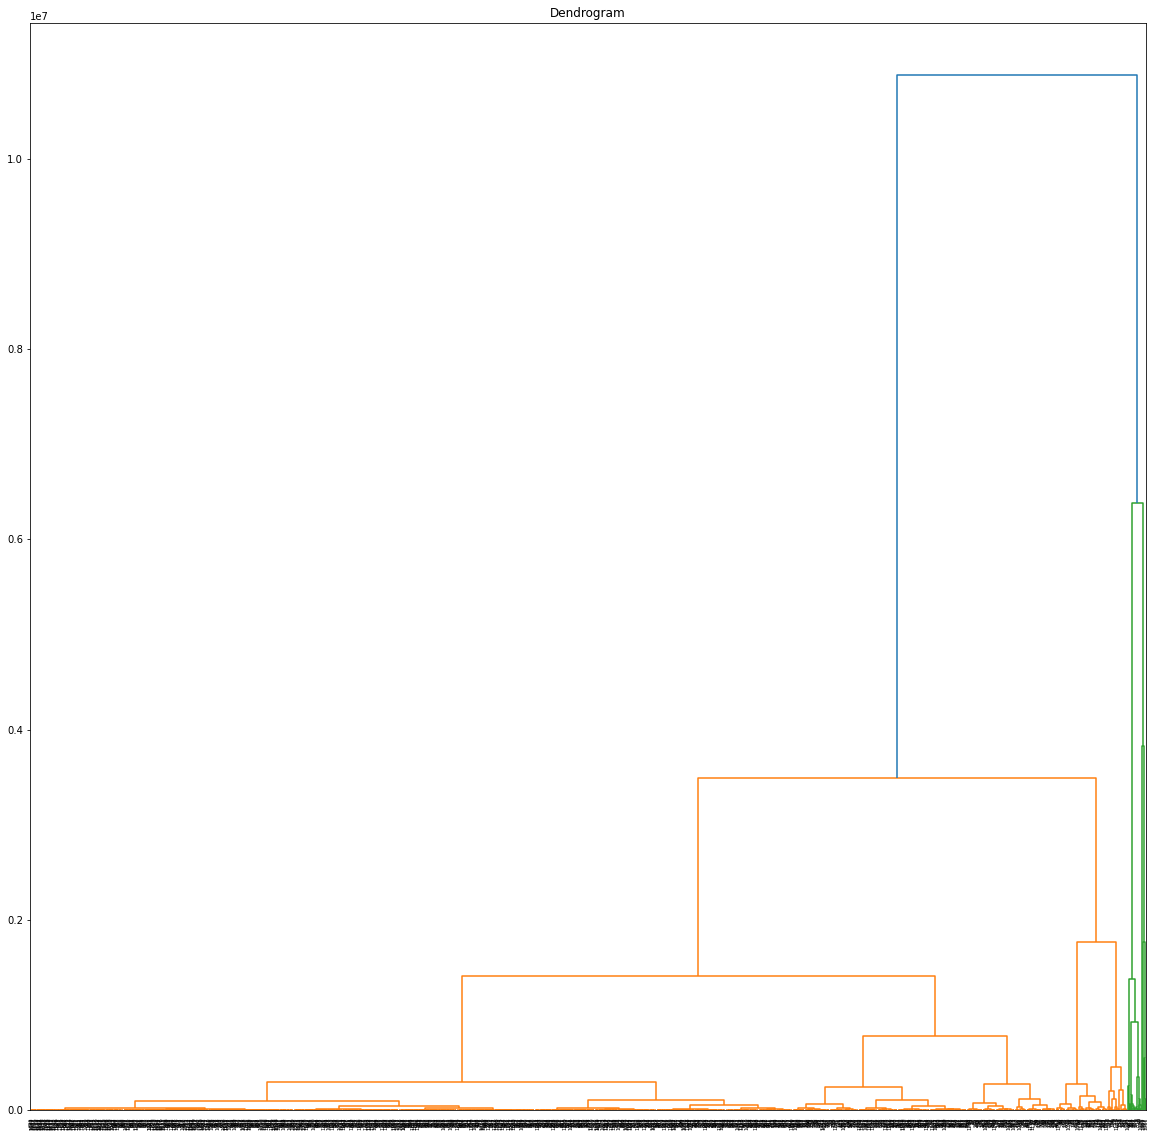

In [37]:
plt.figure(figsize=(20, 20))
plt.title("Dendrogram")

selected_data = data_oh.iloc[:, 2:5]
hc = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
dend = shc.dendrogram(Z=hc)

plt.show()

In [44]:
clusters=shc.cut_tree(hc,2)
right =[] #right target is a list for the values that were classified as 1 (clustered tgt bcs they have similar values) by the hierarchical clustering's main cluster of 2 clusters.

left=[] #left target is a list for the values that were classified as 0 (clustered tgt bcs they have similar values) by the hierarchical clustering's main cluster of 2 clusters.
for i in clusters :
    if i ==1 :
        right.append(clusters[i])
    else :
        left.append(clusters[i])

print("right cluster =" + str(len(right))) 
print("left cluster =" + str(len(left)))
    

right cluster =1227
left cluster =21


In [50]:
#for the accuracy, after doing some research, hierarchical clustering cannot accurately be measured with accuracy
#the closest way to measure its 'accuracy' is by seeing how close their clustering coincides with our targeted value.
#this means that it only calculates the percentage of the estimated coincidental accuracy of our targeted values and the final clustering values
print("Amount in right target = " + str(len(righttarget)))
print("Amount in right cluster = " + str(len(right)))
accuracy = (len(righttarget)/len(right))*100
print("Estimate Coincidental Accuracy = " + str(accuracy))


Amount in right target = 846
Amount in right cluster = 1227
Estimate Coincidental Accuracy = 68.94865525672371
